In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

file_path = '/Users/louis/Downloads/cleansed_data_GL_20240513_v1.csv'
data = pd.read_csv(file_path)

columns_to_drop = ['Label', 'Type of fail', 'date']
data_cleaned = data.drop(columns=columns_to_drop, errors='ignore')

data_cleaned.columns = data_cleaned.columns.str.strip()
data_cleaned['datadate'] = pd.to_datetime(data_cleaned['datadate'], errors='coerce')
data_cleaned['datetime'] = pd.to_datetime(data_cleaned['datetime'], format='%I:%M:%S.%f %p').dt.time

print(data_cleaned['datadate'].head())

print(data_cleaned.shape)
print(data_cleaned.columns)
print(data_cleaned.info())
print(data_cleaned.describe())


/var/folders/68/07lm4ng11sg3ryv6967nmsnm0000gn/T/ipykernel_45720/1328313260.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['datadate'] = pd.to_datetime(data_cleaned['datadate'], errors='coerce')


ValueError: time data " 3:28:15.010 PM" doesn't match format "%I:%M:%S.%f %p", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Index(['TenantId', 'Id', 'CorrelationId', 'ActivityId', 'ActorClientId',
       'ActorCUID', 'ActorUserId', 'ActorUPN', 'AuthenticationMechanism',
       'TimeGenerated [UTC]', 'datadate', 'datatime', 'ScopeType',
       'ScopeDisplayName', 'ScopeId', 'ProjectId', 'ProjectName', 'IpAddress',
       'UserAgent', 'OperationName', 'Data', 'Details', 'Area', 'Category',
       'CategoryDisplayName', 'ActorDisplayName', 'SourceSystem', 'Type',
       'Label', 'Type of  fail', 'date'],
      dtype='object')
0   2024-05-13
1   2024-05-13
2   2024-05-13
3   2024-01-02
4   2024-01-02
Name: datadate, dtype: datetime64[ns]
0    15:28:15.010000
1    15:28:15.240000
2    15:28:15.357000
3    22:02:59.950000
4    22:03:00.853000
Name: datatime, dtype: object


/var/folders/68/07lm4ng11sg3ryv6967nmsnm0000gn/T/ipykernel_45720/3184124182.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['datadate'] = pd.to_datetime(data['datadate'], errors='coerce')


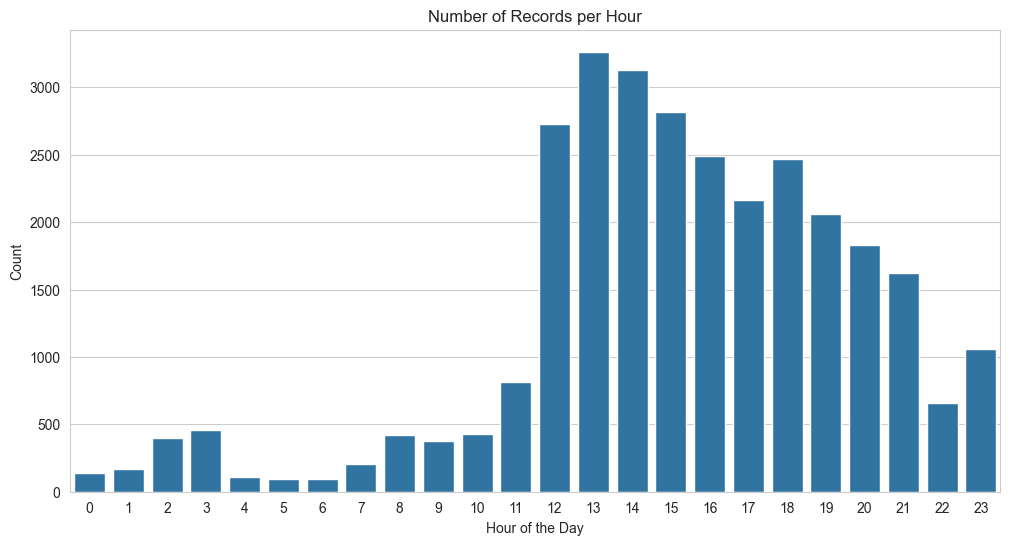

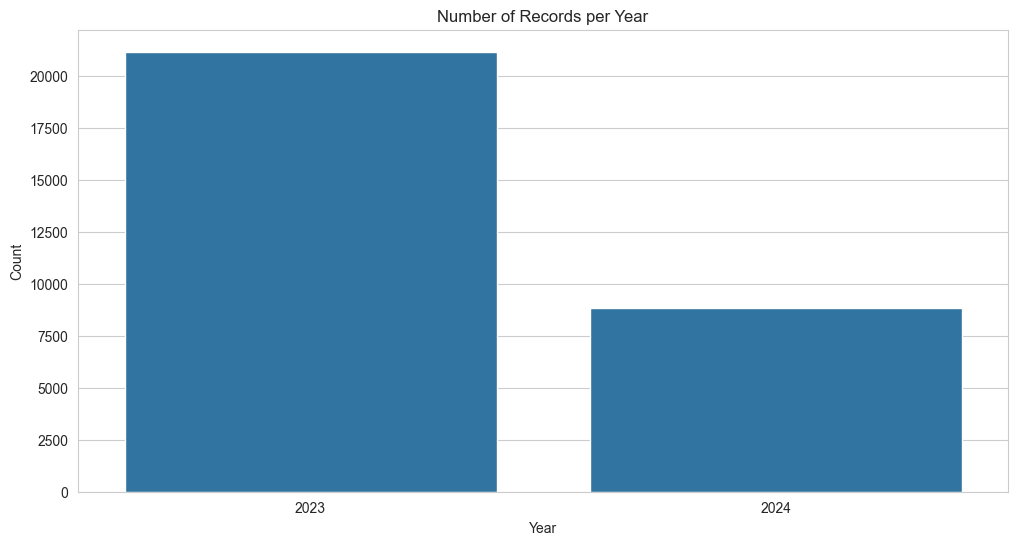

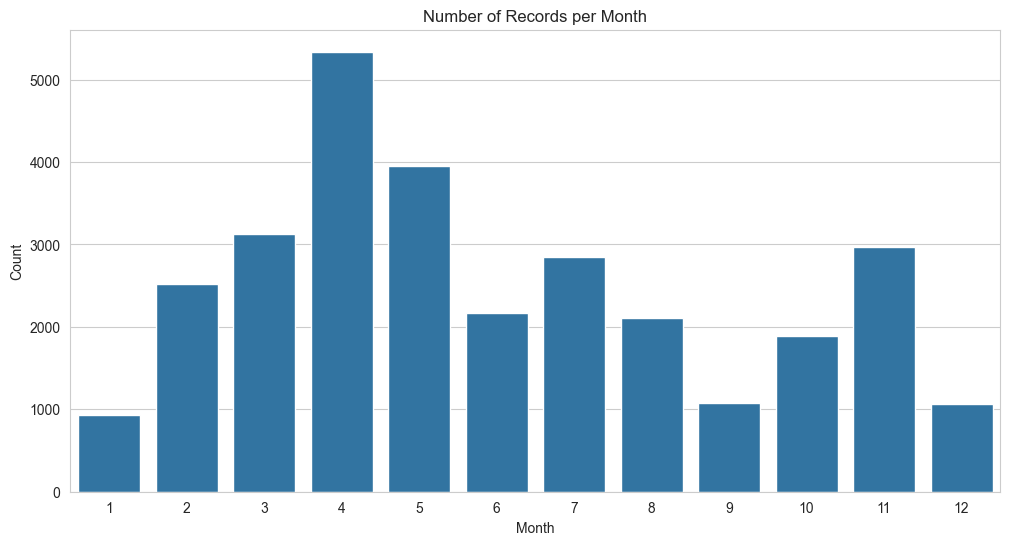

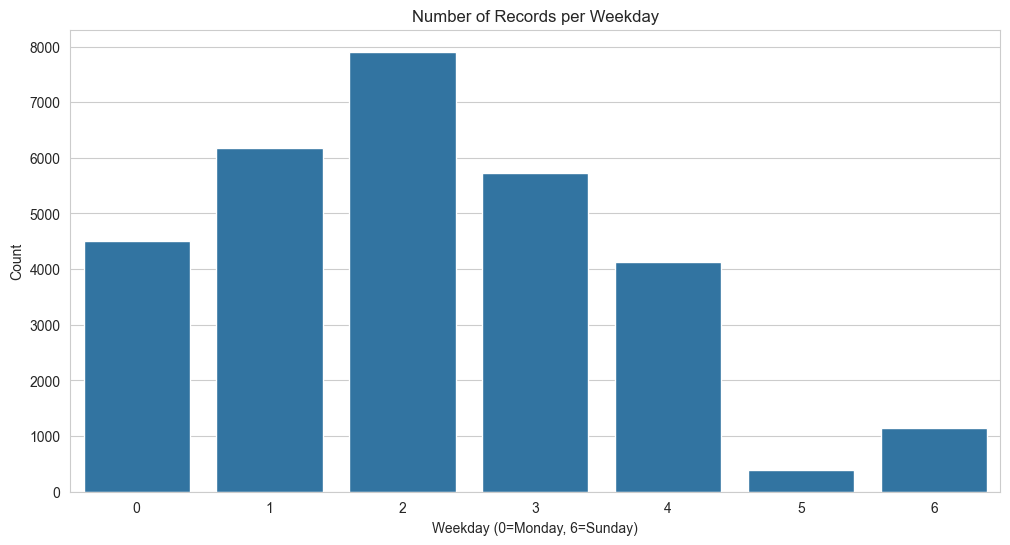

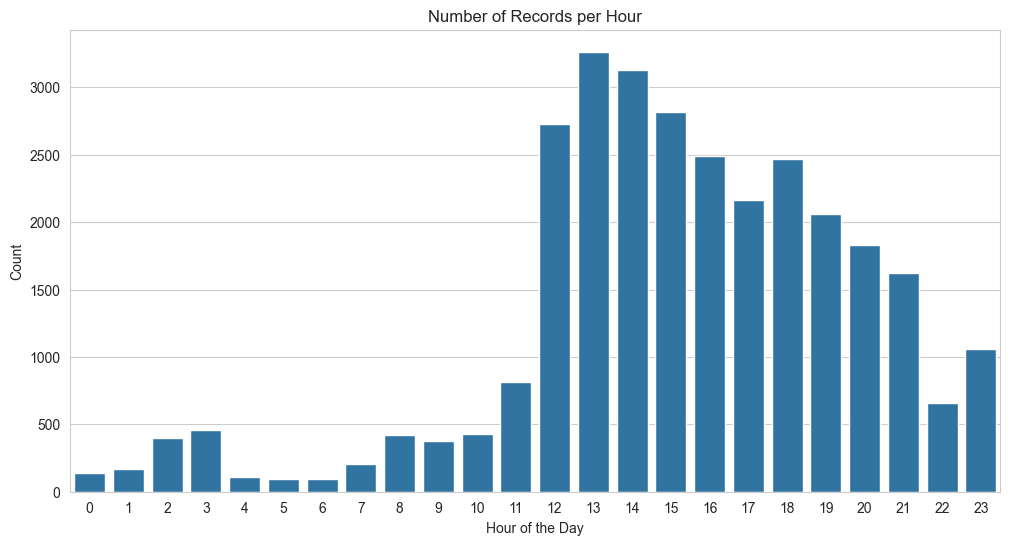

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = '/Users/louis/Downloads/cleansed_data_GL_20240513_v1.csv'
data = pd.read_csv(file_path)

# 打印所有列名以检查问题
print(data.columns)

# 清理列名，去掉前后的空格
data.columns = data.columns.str.strip()

# 处理 'datadate' 列
if 'datadate' in data.columns:
    data['datadate'] = pd.to_datetime(data['datadate'], errors='coerce')
    print(data['datadate'].head())
else:
    print("Column 'datadate' not found in the dataset.")

# 处理 'datatime' 列
if 'datatime' in data.columns:
    # 去除前导空格
    data['datatime'] = data['datatime'].str.strip()
    data['datatime'] = pd.to_datetime(data['datatime'], format='%I:%M:%S.%f %p').dt.time
    print(data['datatime'].head())
else:
    print("Column 'datatime' not found in the dataset.")

data.set_index('datadate', inplace=True)
data['datetime'] = data.index + pd.to_timedelta(data['datatime'].astype(str))
data.set_index('datetime', inplace=True)


# Year
data['Year'] = data.index.year
year_counts = data['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Number of Records per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Month
data['Month'] = data.index.month
month_counts = data['Month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title('Number of Records per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# Weekday
data['Weekday'] = data.index.dayofweek
weekday_counts = data['Weekday'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title('Number of Records per Weekday')
plt.xlabel('Weekday (0=Monday, 6=Sunday)')
plt.ylabel('Count')
plt.show()

# Hour
hour_counts = data['Hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title('Number of Records per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

Index(['TenantId', 'Id', 'CorrelationId', 'ActivityId', 'ActorClientId',
       'ActorCUID', 'ActorUserId', 'ActorUPN', 'AuthenticationMechanism',
       'TimeGenerated [UTC]', 'datadate', 'datatime', 'ScopeType',
       'ScopeDisplayName', 'ScopeId', 'ProjectId', 'ProjectName', 'IpAddress',
       'UserAgent', 'OperationName', 'Data', 'Details', 'Area', 'Category',
       'CategoryDisplayName', 'ActorDisplayName', 'SourceSystem', 'Type',
       'Label', 'Type of  fail', 'date'],
      dtype='object')
0   2024-05-13
1   2024-05-13
2   2024-05-13
3   2024-01-02
4   2024-01-02
Name: datadate, dtype: datetime64[ns]
0    15:28:15.010000
1    15:28:15.240000
2    15:28:15.357000
3    22:02:59.950000
4    22:03:00.853000
Name: datatime, dtype: object


/var/folders/68/07lm4ng11sg3ryv6967nmsnm0000gn/T/ipykernel_45720/2838866404.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['datadate'] = pd.to_datetime(data['datadate'], errors='coerce')


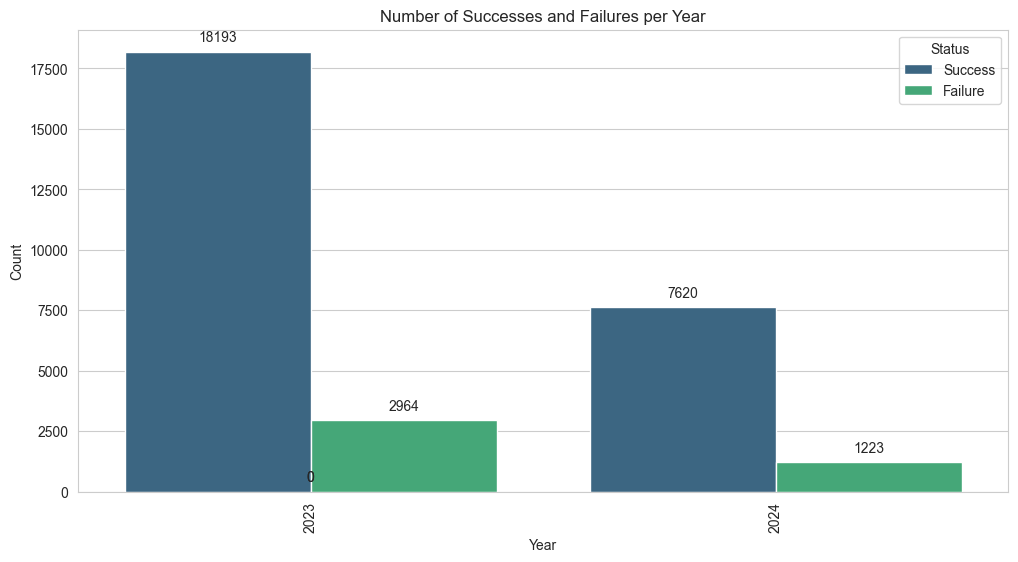

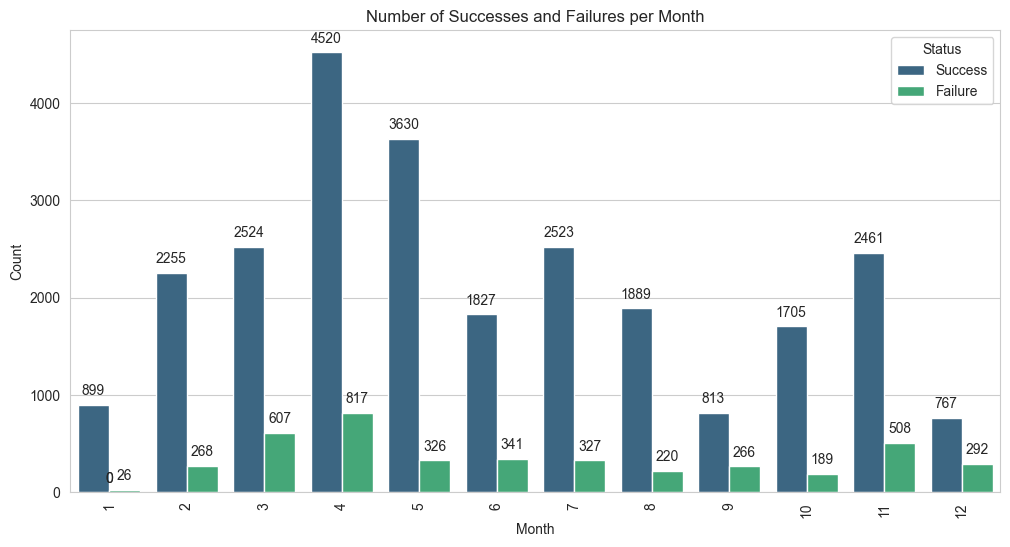

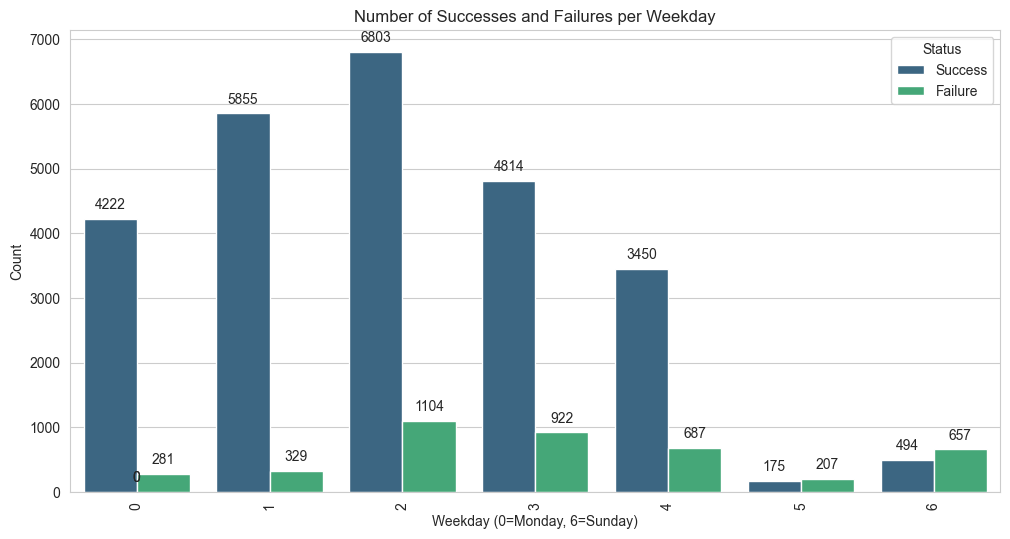

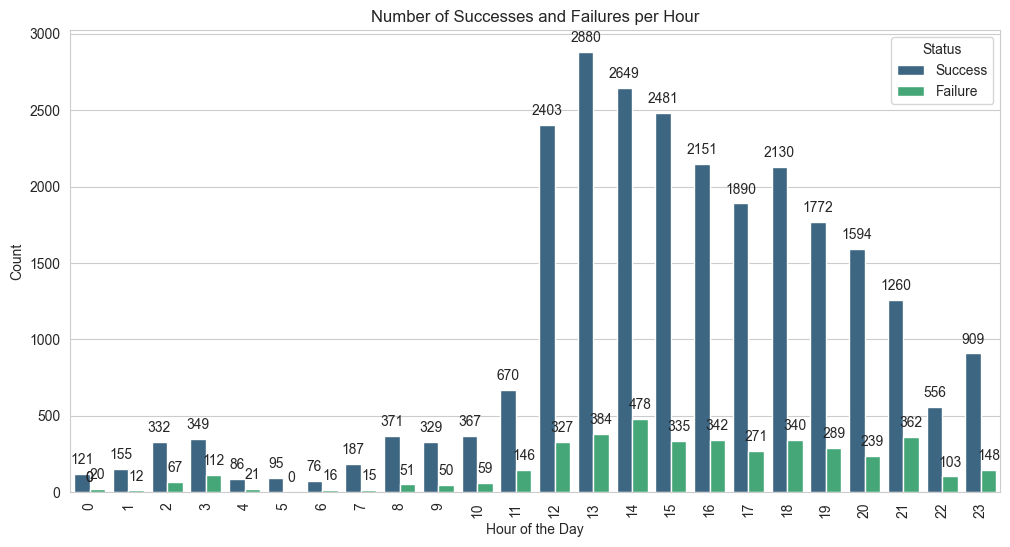

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = '/Users/louis/Downloads/cleansed_data_GL_20240513_v1.csv'
data = pd.read_csv(file_path)

# 打印所有列名以检查问题
print(data.columns)

# 清理列名，去掉前后的空格
data.columns = data.columns.str.strip()

# 处理 'datadate' 列
if 'datadate' in data.columns:
    data['datadate'] = pd.to_datetime(data['datadate'], errors='coerce')
    print(data['datadate'].head())
else:
    print("Column 'datadate' not found in the dataset.")

# 处理 'datatime' 列
if 'datatime' in data.columns:
    # 去除前导空格
    data['datatime'] = data['datatime'].str.strip()
    data['datatime'] = pd.to_datetime(data['datatime'], format='%I:%M:%S.%f %p').dt.time
    print(data['datatime'].head())
else:
    print("Column 'datatime' not found in the dataset.")

data.set_index('datadate', inplace=True)
data['datetime'] = data.index + pd.to_timedelta(data['datatime'].astype(str))
data.set_index('datetime', inplace=True)

# 假设Label列中'Success'表示成功，其他表示失败
data['Label'] = data['Label'].apply(lambda x: 'Success' if str(x).lower() == 'success' else 'Failure')

# 年统计成功和失败次数
data['Year'] = data.index.year
year_counts = data.groupby(['Year', 'Label']).size().unstack(fill_value=0).reset_index()

# 月统计成功和失败次数
data['Month'] = data.index.month
month_counts = data.groupby(['Month', 'Label']).size().unstack(fill_value=0).reset_index()

# 星期统计成功和失败次数
data['Weekday'] = data.index.dayofweek
weekday_counts = data.groupby(['Weekday', 'Label']).size().unstack(fill_value=0).reset_index()

# 小时统计成功和失败次数
data['Hour'] = data.index.hour
hour_counts = data.groupby(['Hour', 'Label']).size().unstack(fill_value=0).reset_index()

# 绘制带有数量标签的条形图的函数
def plot_with_labels(df, x_col, y_col, hue_col, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=x_col, y=y_col, hue=hue_col, data=df, palette='viridis')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.legend(title=hue_col)
    plt.show()

# 绘制年统计图
year_data = year_counts.melt(id_vars='Year', value_vars=['Success', 'Failure'], var_name='Status', value_name='Count')
plot_with_labels(year_data, 'Year', 'Count', 'Status', 'Number of Successes and Failures per Year', 'Year', 'Count')

# 绘制月统计图
month_data = month_counts.melt(id_vars='Month', value_vars=['Success', 'Failure'], var_name='Status', value_name='Count')
plot_with_labels(month_data, 'Month', 'Count', 'Status', 'Number of Successes and Failures per Month', 'Month', 'Count')

# 绘制星期统计图
weekday_data = weekday_counts.melt(id_vars='Weekday', value_vars=['Success', 'Failure'], var_name='Status', value_name='Count')
plot_with_labels(weekday_data, 'Weekday', 'Count', 'Status', 'Number of Successes and Failures per Weekday', 'Weekday (0=Monday, 6=Sunday)', 'Count')

# 绘制小时统计图
hour_data = hour_counts.melt(id_vars='Hour', value_vars=['Success', 'Failure'], var_name='Status', value_name='Count')
plot_with_labels(hour_data, 'Hour', 'Count', 'Status', 'Number of Successes and Failures per Hour', 'Hour of the Day', 'Count')


Column ProjectId found in the dataset.
Column Category found in the dataset.
Column Label found in the dataset.


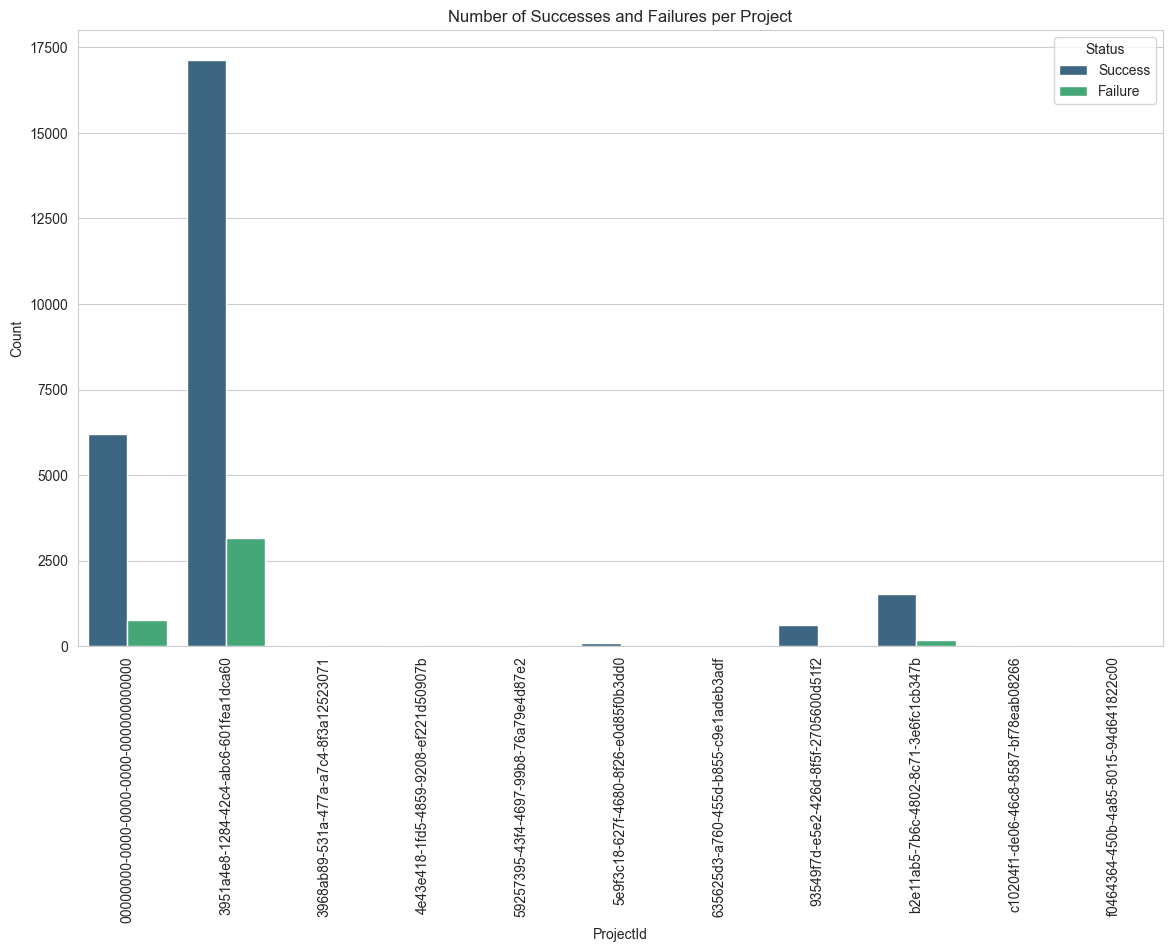

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = '/Users/louis/Downloads/cleansed_data_GL_20240513_v1.csv'
data = pd.read_csv(file_path)

# 确保列名没有隐藏字符
data.columns = data.columns.str.strip()

# 确保需要的列存在
required_columns = ['ProjectId', 'Category', 'Label']
for col in required_columns:
    if col not in data.columns:
        print(f"Column {col} not found in the dataset.")
    else:
        print(f"Column {col} found in the dataset.")

# 假设Label列中'Success'表示成功，其他表示失败
data['Label'] = data['Label'].apply(lambda x: 'Success' if str(x).lower() == 'success' else 'Failure')

# 按ProjectId统计成功和失败次数
success_fail_counts = data.groupby(['ProjectId', 'Label']).size().unstack(fill_value=0).reset_index()

# 将 Success 和 Failure 列转换为数值类型
success_fail_counts['Success'] = success_fail_counts.get('Success', 0)
success_fail_counts['Failure'] = success_fail_counts.get('Failure', 0)

# 重塑数据以便绘图
project_data = success_fail_counts.melt(id_vars=['ProjectId'], value_vars=['Success', 'Failure'],
                                        var_name='Status', value_name='Count')

# 绘制所有项目的成功和失败次数
plt.figure(figsize=(14, 8))
sns.barplot(x='ProjectId', y='Count', hue='Status', data=project_data, palette='viridis')
plt.title('Number of Successes and Failures per Project')
plt.xlabel('ProjectId')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Status')
plt.show()


Index(['TenantId', 'Id', 'CorrelationId', 'ActivityId', 'ActorClientId',
       'ActorCUID', 'ActorUserId', 'ActorUPN', 'AuthenticationMechanism',
       'TimeGenerated [UTC]', 'datadate', 'datatime', 'ScopeType',
       'ScopeDisplayName', 'ScopeId', 'ProjectId', 'ProjectName', 'IpAddress',
       'UserAgent', 'OperationName', 'Data', 'Details', 'Area', 'Category',
       'CategoryDisplayName', 'ActorDisplayName', 'SourceSystem', 'Type',
       'Label', 'Type of  fail', 'date'],
      dtype='object')
0   2024-05-13
1   2024-05-13
2   2024-05-13
3   2024-01-02
4   2024-01-02
Name: datadate, dtype: datetime64[ns]
0    15:28:15.010000
1    15:28:15.240000
2    15:28:15.357000
3    22:02:59.950000
4    22:03:00.853000
Name: datatime, dtype: object


/var/folders/68/07lm4ng11sg3ryv6967nmsnm0000gn/T/ipykernel_45720/2181808923.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['datadate'] = pd.to_datetime(data['datadate'], errors='coerce')
/var/folders/68/07lm4ng11sg3ryv6967nmsnm0000gn/T/ipykernel_45720/2181808923.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  project_data['Year'] = project_data.index.year
/var/folders/68/07lm4ng11sg3ryv6967nmsnm0000gn/T/ipykernel_45720/2181808923.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

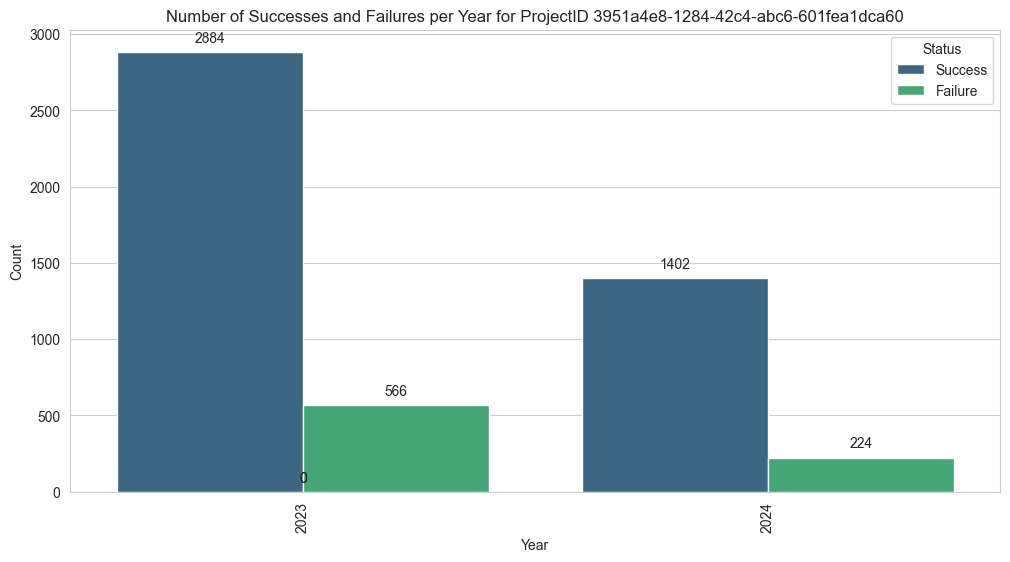

/var/folders/68/07lm4ng11sg3ryv6967nmsnm0000gn/T/ipykernel_45720/2181808923.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=x_col, y=y_col, hue=hue_col, data=df, palette='viridis', ci=None)


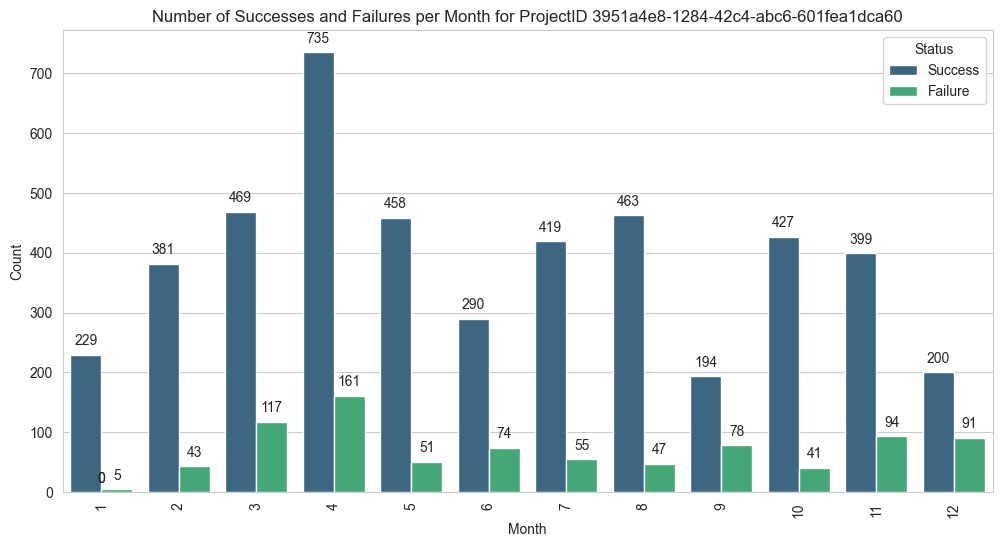

/var/folders/68/07lm4ng11sg3ryv6967nmsnm0000gn/T/ipykernel_45720/2181808923.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=x_col, y=y_col, hue=hue_col, data=df, palette='viridis', ci=None)


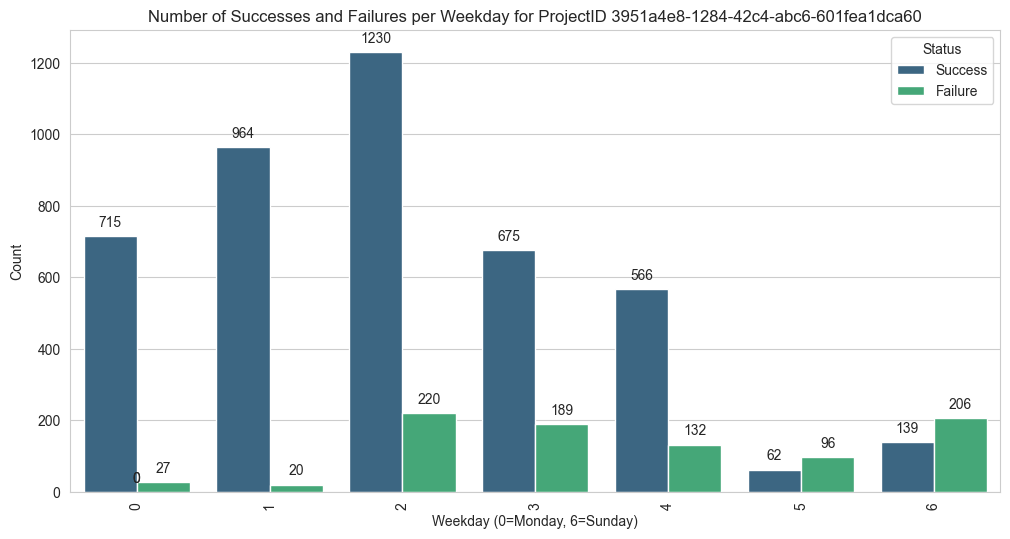

/var/folders/68/07lm4ng11sg3ryv6967nmsnm0000gn/T/ipykernel_45720/2181808923.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=x_col, y=y_col, hue=hue_col, data=df, palette='viridis', ci=None)


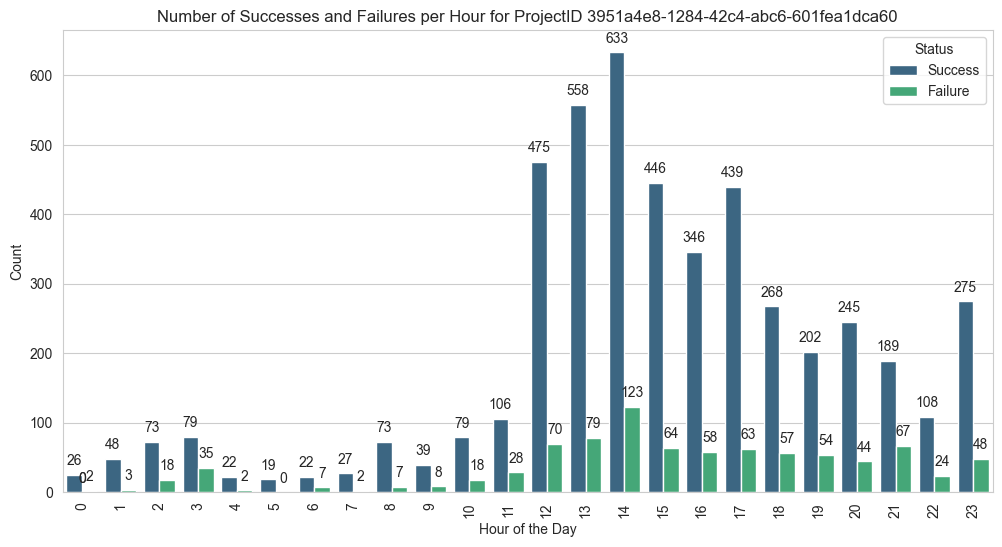

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = '/Users/louis/Downloads/cleansed_data_GL_20240513_v1.csv'
data = pd.read_csv(file_path)

# 打印所有列名以检查问题
print(data.columns)

# 清理列名，去掉前后的空格
data.columns = data.columns.str.strip()

# 处理 'datadate' 列
if 'datadate' in data.columns:
    data['datadate'] = pd.to_datetime(data['datadate'], errors='coerce')
    print(data['datadate'].head())
else:
    print("Column 'datadate' not found in the dataset.")

# 处理 'datatime' 列
if 'datatime' in data.columns:
    # 去除前导空格
    data['datatime'] = data['datatime'].str.strip()
    data['datatime'] = pd.to_datetime(data['datatime'], format='%I:%M:%S.%f %p').dt.time
    print(data['datatime'].head())
else:
    print("Column 'datatime' not found in the dataset.")

data.set_index('datadate', inplace=True)
data['datetime'] = data.index + pd.to_timedelta(data['datatime'].astype(str))
data.set_index('datetime', inplace=True)

# 假设Label列中'Success'表示成功，其他表示失败
data['Label'] = data['Label'].apply(lambda x: 'Success' if str(x).lower() == 'success' else 'Failure')

# 只分析特定 ProjectID
project_id = '3951a4e8-1284-42c4-abc6-601fea1dca60'
project_data = data[data['ProjectId'] == project_id]

# 年统计成功和失败次数
project_data['Year'] = project_data.index.year
year_counts = project_data.groupby(['Year', 'Category', 'Label']).size().unstack(fill_value=0).reset_index()

# 月统计成功和失败次数
project_data['Month'] = project_data.index.month
month_counts = project_data.groupby(['Month', 'Category', 'Label']).size().unstack(fill_value=0).reset_index()

# 星期统计成功和失败次数
project_data['Weekday'] = project_data.index.dayofweek
weekday_counts = project_data.groupby(['Weekday', 'Category', 'Label']).size().unstack(fill_value=0).reset_index()

# 小时统计成功和失败次数
project_data['Hour'] = project_data.index.hour
hour_counts = project_data.groupby(['Hour', 'Category', 'Label']).size().unstack(fill_value=0).reset_index()

# 绘制带有数量标签的条形图的函数
def plot_with_labels(df, x_col, y_col, hue_col, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=x_col, y=y_col, hue=hue_col, data=df, palette='viridis', ci=None)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(format(height, '.0f'), 
                   (p.get_x() + p.get_width() / 2., height), 
                   ha='center', va='center', 
                   xytext=(0, 10), 
                   textcoords='offset points')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.legend(title=hue_col)
    plt.show()

# 绘制年统计图
year_data = year_counts.melt(id_vars=['Year', 'Category'], value_vars=['Success', 'Failure'], var_name='Status', value_name='Count')
plot_with_labels(year_data, 'Year', 'Count', 'Status', 'Number of Successes and Failures per Year for ProjectID ' + project_id, 'Year', 'Count')

# 绘制月统计图
month_data = month_counts.melt(id_vars=['Month', 'Category'], value_vars=['Success', 'Failure'], var_name='Status', value_name='Count')
plot_with_labels(month_data, 'Month', 'Count', 'Status', 'Number of Successes and Failures per Month for ProjectID ' + project_id, 'Month', 'Count')

# 绘制星期统计图
weekday_data = weekday_counts.melt(id_vars=['Weekday', 'Category'], value_vars=['Success', 'Failure'], var_name='Status', value_name='Count')
plot_with_labels(weekday_data, 'Weekday', 'Count', 'Status', 'Number of Successes and Failures per Weekday for ProjectID ' + project_id, 'Weekday (0=Monday, 6=Sunday)', 'Count')

# 绘制小时统计图
hour_data = hour_counts.melt(id_vars=['Hour', 'Category'], value_vars=['Success', 'Failure'], var_name='Status', value_name='Count')
plot_with_labels(hour_data, 'Hour', 'Count', 'Status', 'Number of Successes and Failures per Hour for ProjectID ' + project_id, 'Hour of the Day', 'Count')


Index(['TenantId', 'Id', 'CorrelationId', 'ActivityId', 'ActorClientId',
       'ActorCUID', 'ActorUserId', 'ActorUPN', 'AuthenticationMechanism',
       'TimeGenerated [UTC]', 'datadate', 'datatime', 'ScopeType',
       'ScopeDisplayName', 'ScopeId', 'ProjectId', 'ProjectName', 'IpAddress',
       'UserAgent', 'OperationName', 'Data', 'Details', 'Area', 'Category',
       'CategoryDisplayName', 'ActorDisplayName', 'SourceSystem', 'Type',
       'Label', 'Type of  fail', 'date'],
      dtype='object')
0   2024-05-13
1   2024-05-13
2   2024-05-13
3   2024-01-02
4   2024-01-02
Name: datadate, dtype: datetime64[ns]
0    15:28:15.010000
1    15:28:15.240000
2    15:28:15.357000
3    22:02:59.950000
4    22:03:00.853000
Name: datatime, dtype: object


/var/folders/68/07lm4ng11sg3ryv6967nmsnm0000gn/T/ipykernel_45720/2181808923.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['datadate'] = pd.to_datetime(data['datadate'], errors='coerce')
/var/folders/68/07lm4ng11sg3ryv6967nmsnm0000gn/T/ipykernel_45720/2181808923.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  project_data['Year'] = project_data.index.year
/var/folders/68/07lm4ng11sg3ryv6967nmsnm0000gn/T/ipykernel_45720/2181808923.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

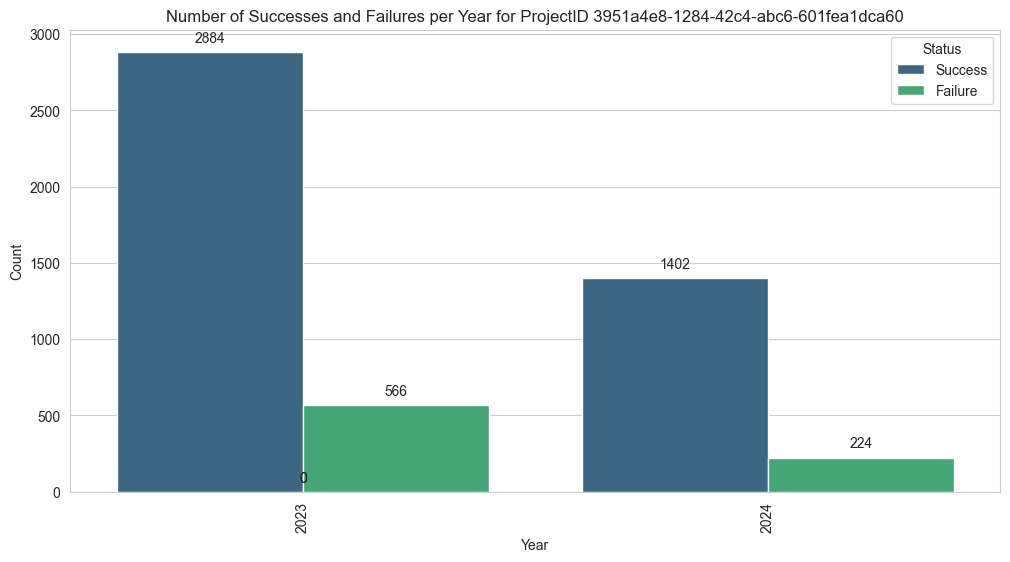

/var/folders/68/07lm4ng11sg3ryv6967nmsnm0000gn/T/ipykernel_45720/2181808923.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=x_col, y=y_col, hue=hue_col, data=df, palette='viridis', ci=None)


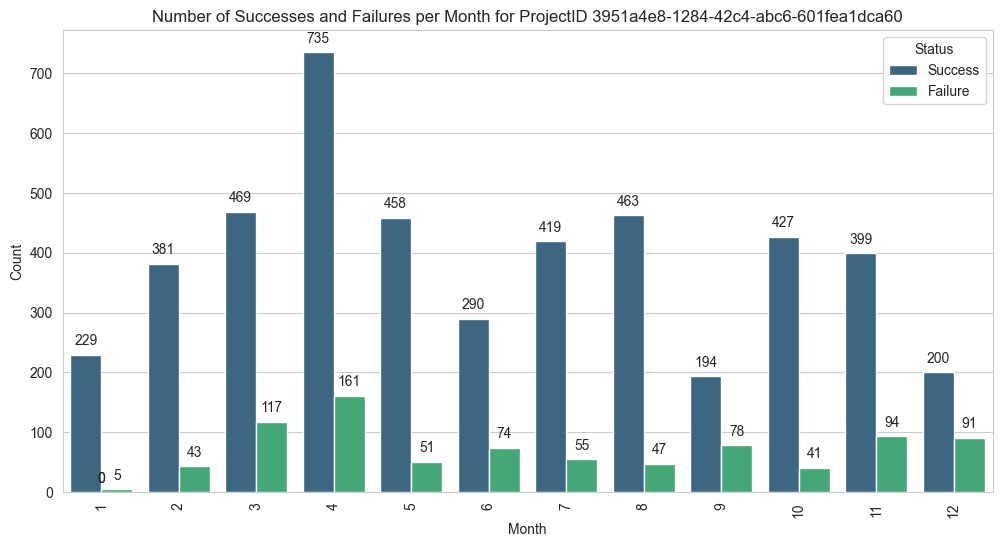

/var/folders/68/07lm4ng11sg3ryv6967nmsnm0000gn/T/ipykernel_45720/2181808923.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=x_col, y=y_col, hue=hue_col, data=df, palette='viridis', ci=None)


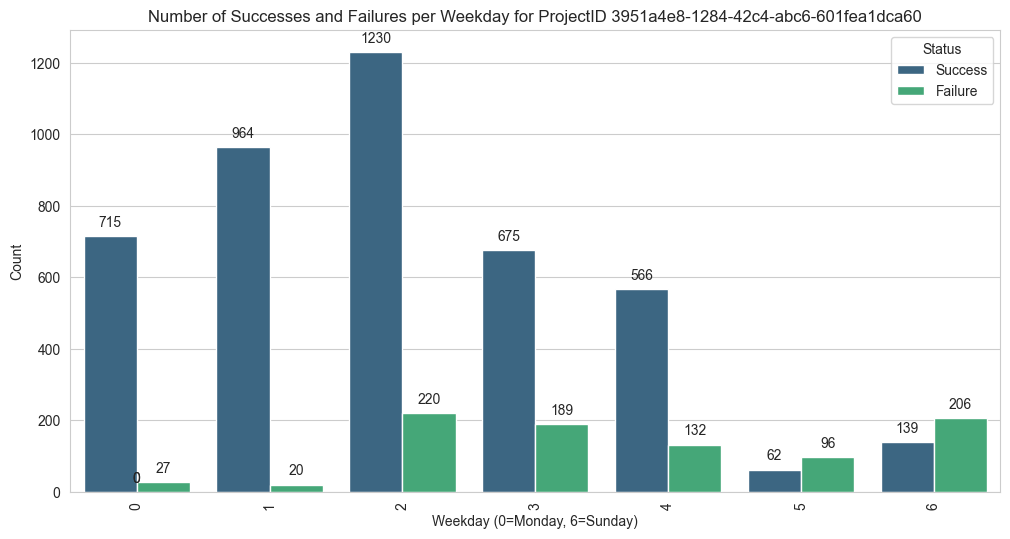

/var/folders/68/07lm4ng11sg3ryv6967nmsnm0000gn/T/ipykernel_45720/2181808923.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=x_col, y=y_col, hue=hue_col, data=df, palette='viridis', ci=None)


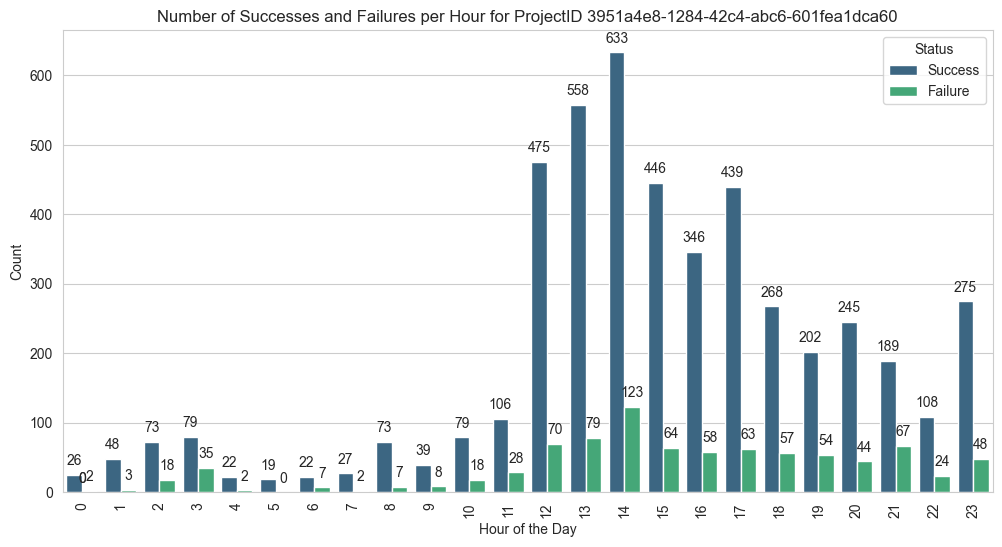

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = '/Users/louis/Downloads/cleansed_data_GL_20240513_v1.csv'
data = pd.read_csv(file_path)

# 打印所有列名以检查问题
print(data.columns)

# 清理列名，去掉前后的空格
data.columns = data.columns.str.strip()

# 处理 'datadate' 列
if 'datadate' in data.columns:
    data['datadate'] = pd.to_datetime(data['datadate'], errors='coerce')
    print(data['datadate'].head())
else:
    print("Column 'datadate' not found in the dataset.")

# 处理 'datatime' 列
if 'datatime' in data.columns:
    # 去除前导空格
    data['datatime'] = data['datatime'].str.strip()
    data['datatime'] = pd.to_datetime(data['datatime'], format='%I:%M:%S.%f %p').dt.time
    print(data['datatime'].head())
else:
    print("Column 'datatime' not found in the dataset.")

data.set_index('datadate', inplace=True)
data['datetime'] = data.index + pd.to_timedelta(data['datatime'].astype(str))
data.set_index('datetime', inplace=True)

# 假设Label列中'Success'表示成功，其他表示失败
data['Label'] = data['Label'].apply(lambda x: 'Success' if str(x).lower() == 'success' else 'Failure')

# 只分析特定 ProjectID
project_id = '3951a4e8-1284-42c4-abc6-601fea1dca60'
project_data = data[data['ProjectId'] == project_id]

# 年统计成功和失败次数
project_data['Year'] = project_data.index.year
year_counts = project_data.groupby(['Year', 'Category', 'Label']).size().unstack(fill_value=0).reset_index()

# 月统计成功和失败次数
project_data['Month'] = project_data.index.month
month_counts = project_data.groupby(['Month', 'Category', 'Label']).size().unstack(fill_value=0).reset_index()

# 星期统计成功和失败次数
project_data['Weekday'] = project_data.index.dayofweek
weekday_counts = project_data.groupby(['Weekday', 'Category', 'Label']).size().unstack(fill_value=0).reset_index()

# 小时统计成功和失败次数
project_data['Hour'] = project_data.index.hour
hour_counts = project_data.groupby(['Hour', 'Category', 'Label']).size().unstack(fill_value=0).reset_index()

# 绘制带有数量标签的条形图的函数
def plot_with_labels(df, x_col, y_col, hue_col, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=x_col, y=y_col, hue=hue_col, data=df, palette='viridis', ci=None)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(format(height, '.0f'), 
                   (p.get_x() + p.get_width() / 2., height), 
                   ha='center', va='center', 
                   xytext=(0, 10), 
                   textcoords='offset points')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.legend(title=hue_col)
    plt.show()

# 绘制年统计图
year_data = year_counts.melt(id_vars=['Year', 'Category'], value_vars=['Success', 'Failure'], var_name='Status', value_name='Count')
plot_with_labels(year_data, 'Year', 'Count', 'Status', 'Number of Successes and Failures per Year for ProjectID ' + project_id, 'Year', 'Count')

# 绘制月统计图
month_data = month_counts.melt(id_vars=['Month', 'Category'], value_vars=['Success', 'Failure'], var_name='Status', value_name='Count')
plot_with_labels(month_data, 'Month', 'Count', 'Status', 'Number of Successes and Failures per Month for ProjectID ' + project_id, 'Month', 'Count')

# 绘制星期统计图
weekday_data = weekday_counts.melt(id_vars=['Weekday', 'Category'], value_vars=['Success', 'Failure'], var_name='Status', value_name='Count')
plot_with_labels(weekday_data, 'Weekday', 'Count', 'Status', 'Number of Successes and Failures per Weekday for ProjectID ' + project_id, 'Weekday (0=Monday, 6=Sunday)', 'Count')

# 绘制小时统计图
hour_data = hour_counts.melt(id_vars=['Hour', 'Category'], value_vars=['Success', 'Failure'], var_name='Status', value_name='Count')
plot_with_labels(hour_data, 'Hour', 'Count', 'Status', 'Number of Successes and Failures per Hour for ProjectID ' + project_id, 'Hour of the Day', 'Count')


Area
Library        14597
Pipelines       4787
Checks          4202
Release         3941
Process          891
Permissions      787
Group            289
Licensing        201
Policy           117
Project           82
Token             79
Git               24
Artifacts          2
Auditing           1
Name: count, dtype: int64
Category
Execute    21231
Modify      6504
Create      2084
Remove       180
Access         1
Name: count, dtype: int64


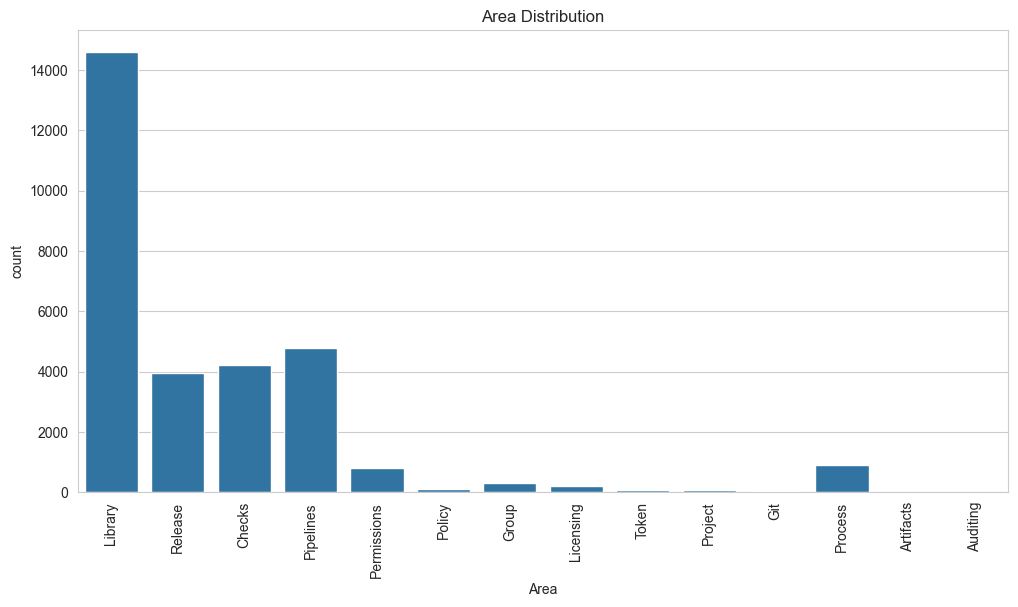

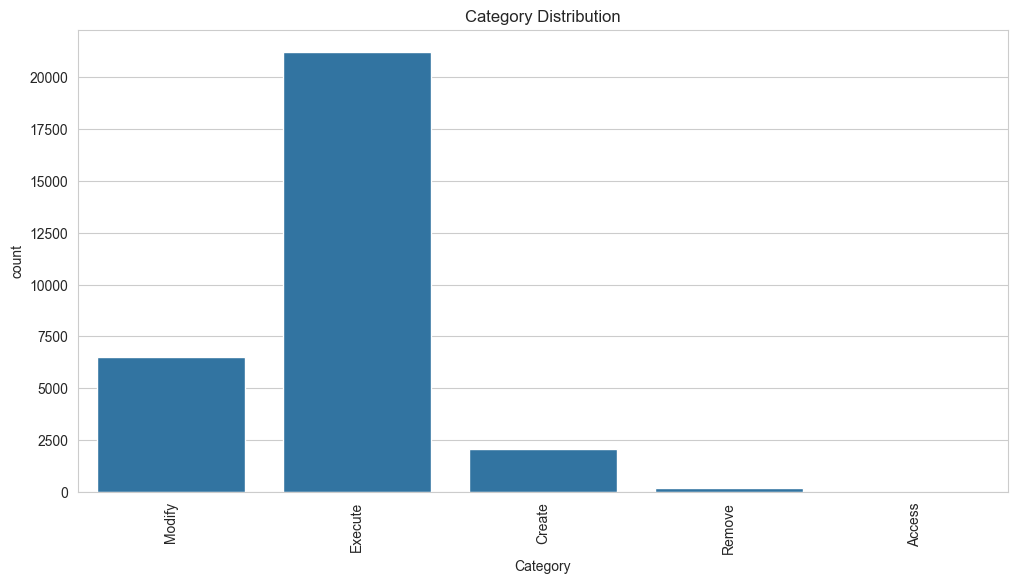

In [39]:
print(data_cleaned['Area'].value_counts())
print(data_cleaned['Category'].value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='Area')
plt.xticks(rotation=90)
plt.title('Area Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='Category')
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()


                                        TenantId  \
datadate                                           
2024-05-13  04e52ac5-b7f1-4af4-b924-d9447fdfe34f   
2024-05-13  04e52ac5-b7f1-4af4-b924-d9447fdfe34f   
2024-05-13  04e52ac5-b7f1-4af4-b924-d9447fdfe34f   
2024-01-02  04e52ac5-b7f1-4af4-b924-d9447fdfe34f   
2024-01-02  04e52ac5-b7f1-4af4-b924-d9447fdfe34f   

                                              Id  \
datadate                                           
2024-05-13  94781e11-d7a5-44a1-82f4-9cfc2bcc0ebe   
2024-05-13  3a86d153-6628-4dd3-8cc0-e0e62d7456b1   
2024-05-13  1c3c1ba1-091f-4751-8cb2-26bacbb1c71c   
2024-01-02  5e7eae23-1a28-47a1-a28b-eab91414bf07   
2024-01-02  ef02d6f7-26e3-46e9-ac39-d6207748ab9e   

                                   CorrelationId  \
datadate                                           
2024-05-13  3ba1abd6-979f-48ea-917a-a3224318f42e   
2024-05-13  3ba1abd6-979f-48ea-917a-a3224318f42e   
2024-05-13  3ba1abd6-979f-48ea-917a-a3224318f42e   
2024-01-02

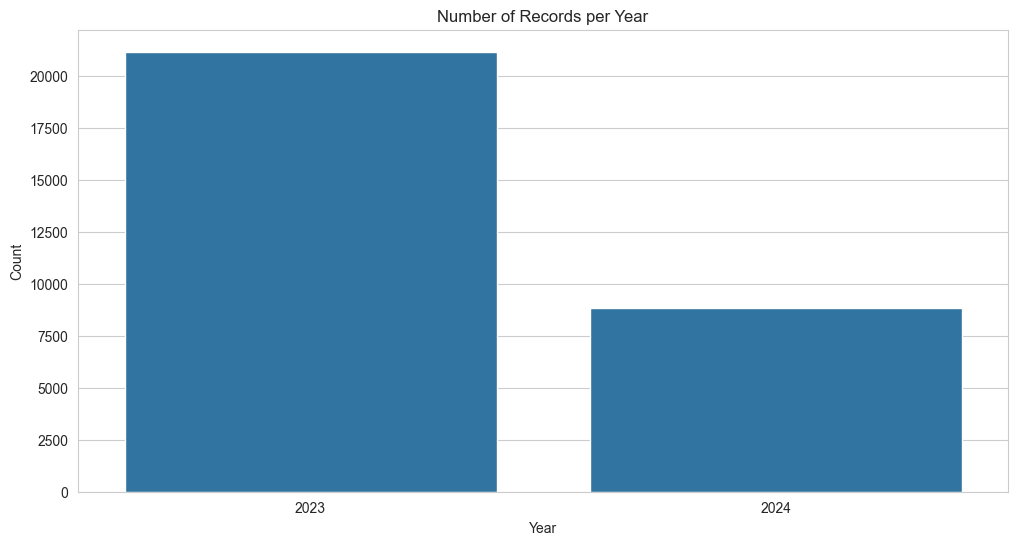

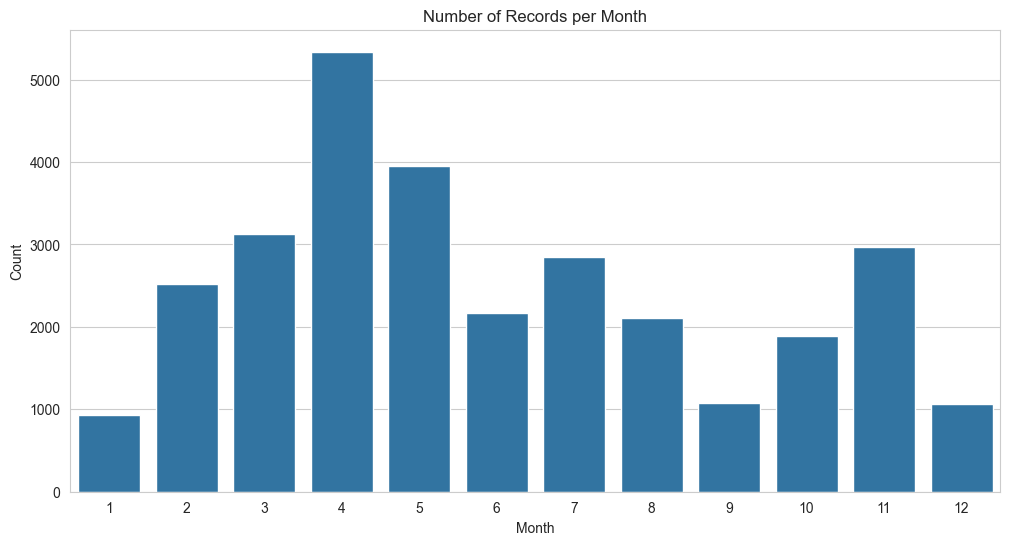

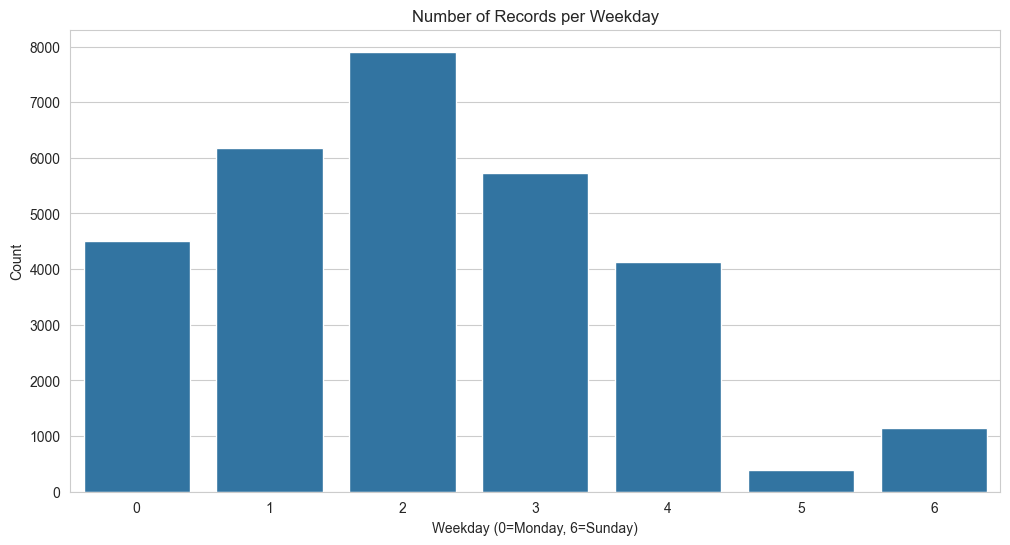

In [41]:
# Set to index
data_cleaned.set_index('datadate', inplace=True)
print(data_cleaned.head())


# Year
data_cleaned['Year'] = data_cleaned.index.year
year_counts = data_cleaned['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Number of Records per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# month
data_cleaned['Month'] = data_cleaned.index.month
month_counts = data_cleaned['Month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title('Number of Records per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# weekday
data_cleaned['Weekday'] = data_cleaned.index.dayofweek
weekday_counts = data_cleaned['Weekday'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title('Number of Records per Weekday')
plt.xlabel('Weekday (0=Monday, 6=Sunday)')
plt.ylabel('Count')
plt.show()


In [ ]:
# 创建一个包含日期和时间的datetime列
data_cleaned['datetime'] = data_cleaned.index + pd.to_timedelta(data_cleaned['datatime'].astype(str))

# 设置新的datetime列为索引
data_cleaned.set_index('datetime', inplace=True)

# 按小时统计
data_cleaned['Hour'] = data_cleaned.index.hour
hour_counts = data_cleaned['Hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title('Number of Records per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()


No numeric columns found for time series analysis.


      Area Category                                          JSON Keys  Count
0  Library   Modify  AgentId, AgentIds, AgentName, AgentPoolId, Age...    993
1  Release  Execute  CallerProcedure, DeploymentResult, PipelineId,...   2490
2  Library  Execute  AnonymousAccess, CallerProcedure, ConnectionId...  11958
3  Library   Modify  AccessPoint, AgentId, AgentName, AgentPoolId, ...   1026
4   Checks  Execute  CallerProcedure, CheckRuns, CheckSuiteId, Chec...   4142
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       76 non-null     object
 1   Category   76 non-null     object
 2   JSON Keys  76 non-null     object
 3   Count      76 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 2.5+ KB
None
              Count
count     76.000000
mean     394.736842
std     1496.781439
min        1.000000
25%        2.750000
50%       14.000000
7

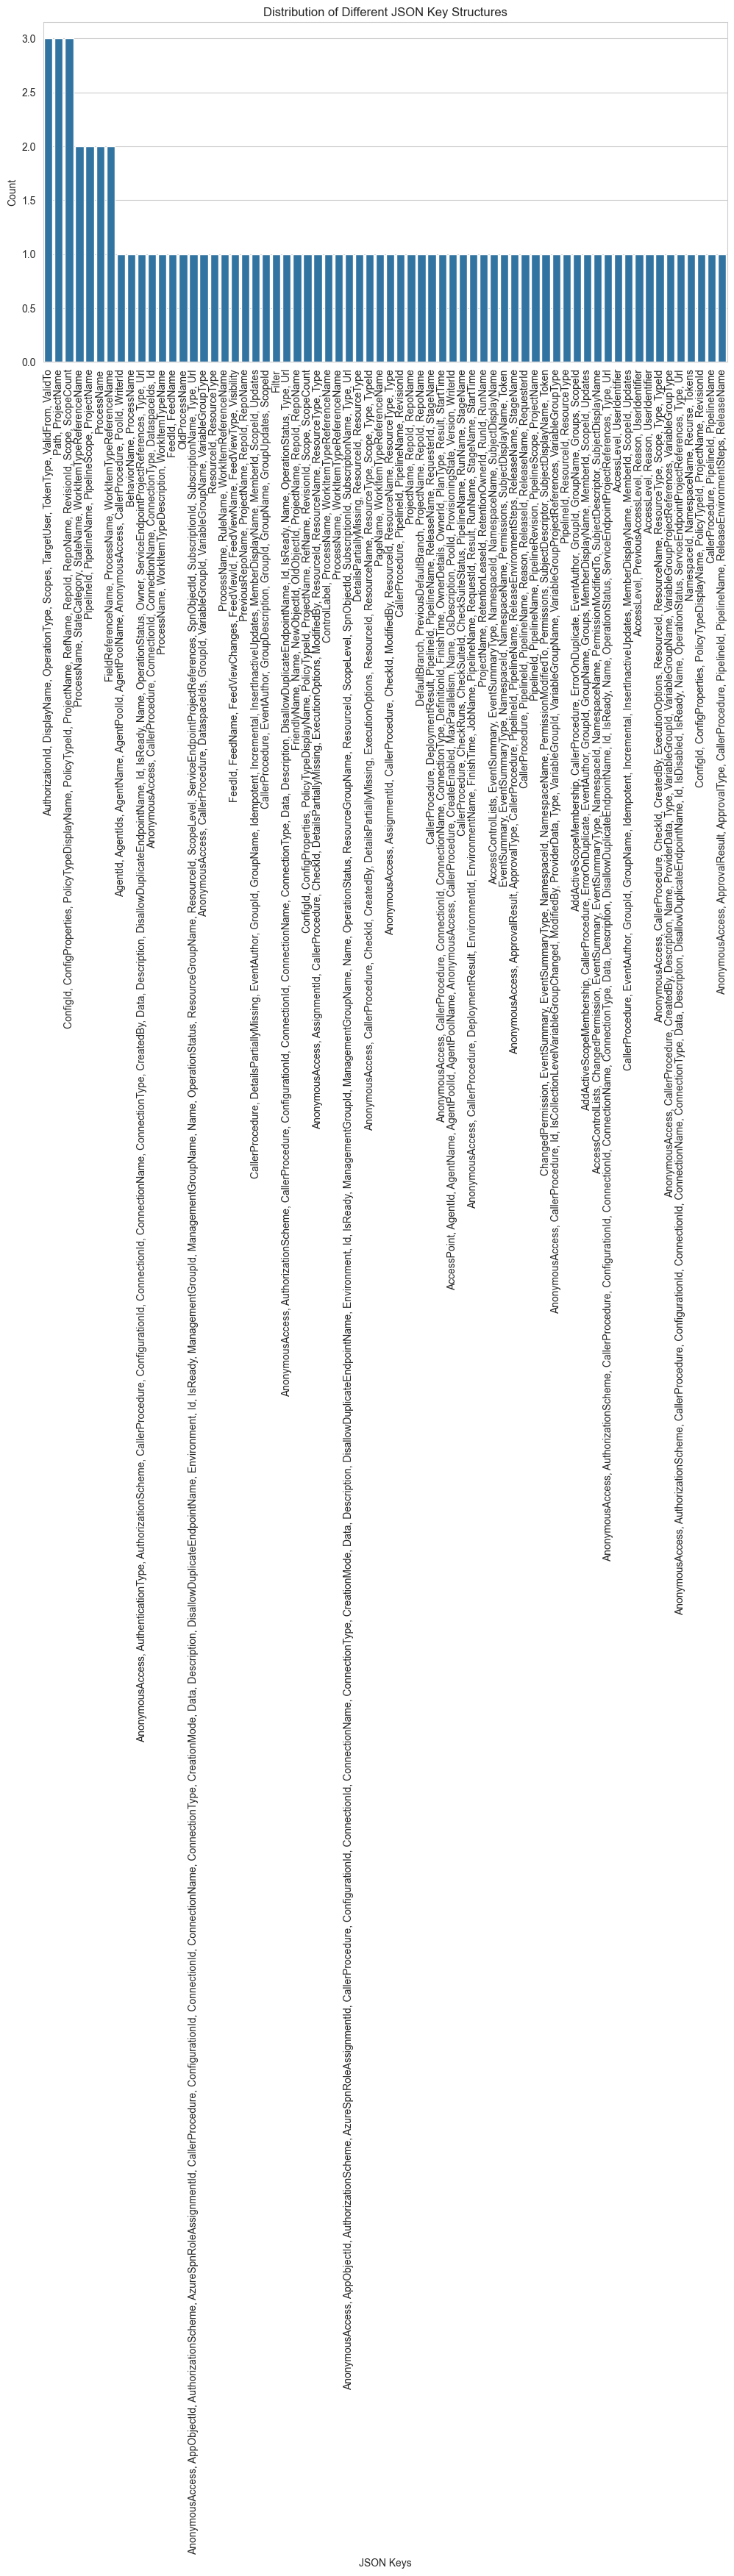

           Area Category  Count
0     Artifacts   Create      1
1     Artifacts   Modify      1
2      Auditing   Access      1
3        Checks   Create     55
4        Checks  Execute   4142
5        Checks   Modify      2
6        Checks   Remove      3
7           Git   Create      8
8           Git   Modify     16
9         Group   Create      5
10        Group   Modify    284
11      Library   Create     47
12      Library  Execute  11958
13      Library   Modify   2583
14      Library   Remove      9
15    Licensing   Create     89
16    Licensing   Modify     98
17    Licensing   Remove     14
18  Permissions   Modify    702
19  Permissions   Remove     85
20    Pipelines   Create     29
21    Pipelines  Execute   2641
22    Pipelines   Modify   2106
23    Pipelines   Remove     11
24       Policy   Create     39
25       Policy   Modify     62
26       Policy   Remove     16
27      Process   Create    850
28      Process   Modify     33
29      Process   Remove      8
30      

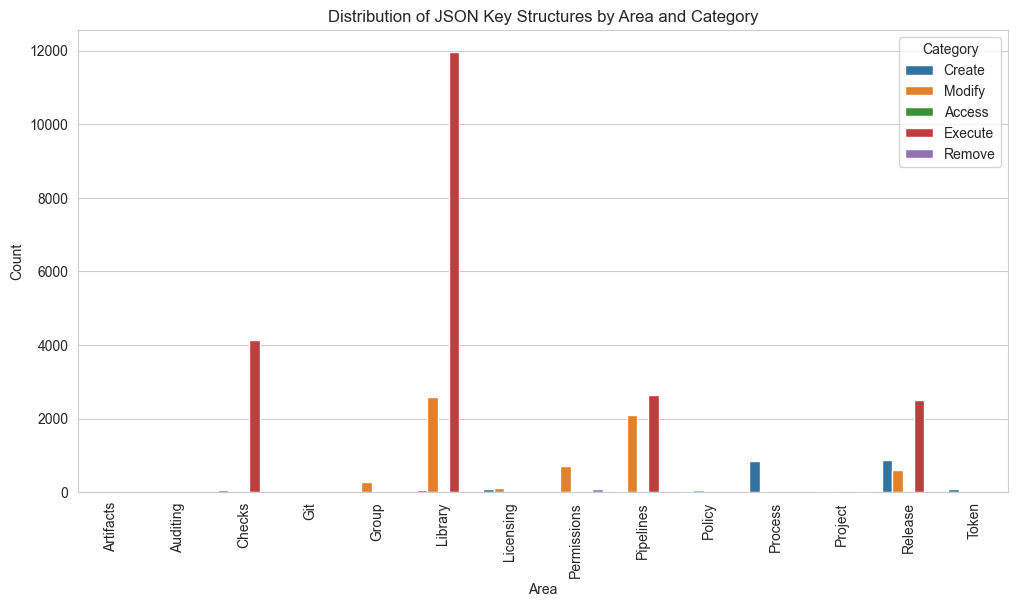

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/Users/louis/Downloads/json_keys_structures_by_area_category.csv'
json_keys_data = pd.read_csv(file_path)

print(json_keys_data.head())
print(json_keys_data.info())
print(json_keys_data.describe())

json_keys_structure_counts = json_keys_data['JSON Keys'].value_counts()
print(json_keys_structure_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=json_keys_structure_counts.index, y=json_keys_structure_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Different JSON Key Structures')
plt.xlabel('JSON Keys')
plt.ylabel('Count')
plt.show()

area_category_grouped = json_keys_data.groupby(['Area', 'Category'])['Count'].sum().reset_index()
print(area_category_grouped)

plt.figure(figsize=(12, 6))
sns.barplot(x='Area', y='Count', hue='Category', data=area_category_grouped)
plt.xticks(rotation=90)
plt.title('Distribution of JSON Key Structures by Area and Category')
plt.xlabel('Area')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()


In [49]:
for i in data_cleaned['ProjectId']:
    if i in data_cleaned['Id'] or i in data_cleaned['CorrelationId']:
        print(i)